In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [3]:
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dogo.results import get_sac_pools, get_experiment_details, PoolArrs
from dogo.rollouts.split import split_halfcheetah_v2_trans_arr
from dogo.visualisation.model_pool_plotting import (
    model_pool_visitation_2dhist,
    model_pool_pen_rewards_2dhist,
    model_pool_unpen_rewards_2dhist,
    model_pool_penalties_2dhist,
    model_pool_rmse_2dhist
)

In [4]:
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [5]:
EXP_LIST = [
    # No REx - MOPO Pen 5 - Rollout Length 10 - 1 Retrain Epoch
    "MP862",
    "MP863",
    "MP864",
    # REx 10 - MOPO Pen 5 - Rollout Length 10 - 1 Retrain Epoch
    "MP865",
    "MP866",
    "MP867",
]
training_results = {}
for exp in EXP_LIST:
    # print(exp)
    training_results[exp] = PoolArrs(*get_sac_pools(exp))

# Pool Analysis

In [6]:
min_angle = +np.inf
max_angle = -np.inf
for exp in EXP_LIST:
    obs, _, next_obs, _, _, _, _ = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    min_angle = min(min_angle, obs[:,1:8].min())#, next_obs[:,1:8].min())
    max_angle = max(max_angle, obs[:,1:8].max())#, next_obs[:,1:8].max())
min_angle, max_angle

(-3.1401336, 3.1406958)

# Reward Histograms

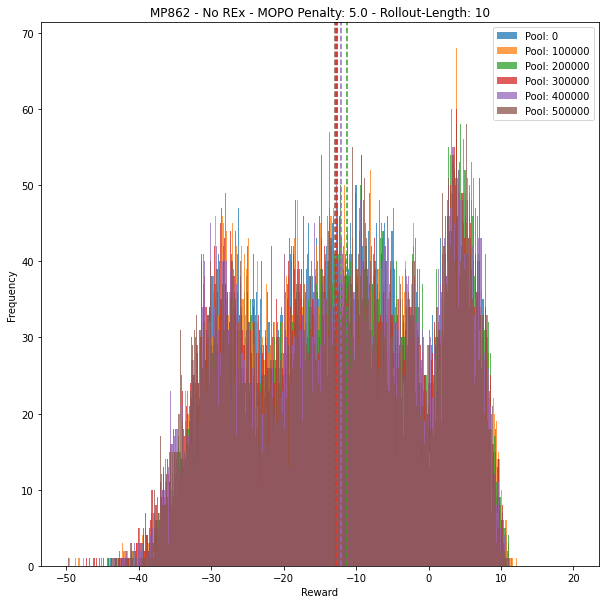

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

exp = 'MP862'
for i, pool_id in enumerate(range(0,600000,100000)):
    pool, _, _, _, _ = get_sac_pools(exp, pool=str(pool_id))
    _, _, _, rew, _, _, _ = split_halfcheetah_v2_trans_arr(pool)
    ax.hist(rew, bins=np.linspace(-50,20,500), color=cols[i], alpha=0.75, label=f'Pool: {pool_id}')
    ax.axvline(rew.mean(), color=cols[i], ls='--')
ax.set_xlabel('Reward')
ax.set_ylabel('Frequency')
ax.set_title(f'{exp} - No REx - MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.legend()

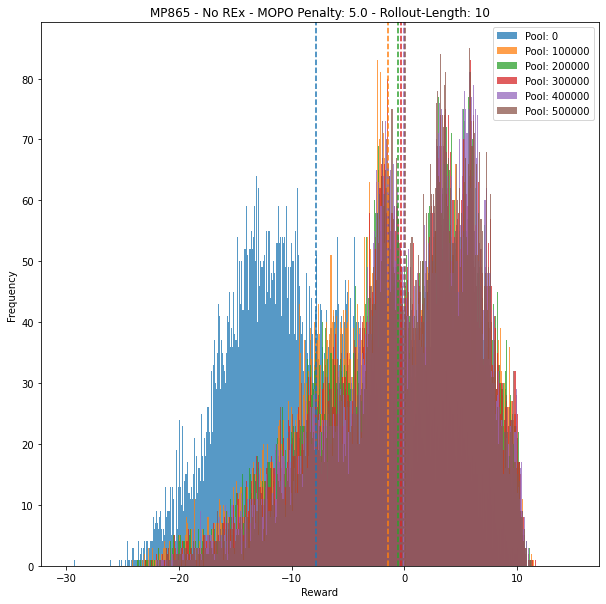

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

exp = 'MP865'
for i, pool_id in enumerate(range(0,600000,100000)):
    pool, _, _, _, _ = get_sac_pools(exp, pool=str(pool_id))
    _, _, _, rew, _, _, _ = split_halfcheetah_v2_trans_arr(pool)
    ax.hist(rew, bins=np.linspace(-30,15,500), color=cols[i], alpha=0.75, label=f'Pool: {pool_id}')
    ax.axvline(rew.mean(), color=cols[i], ls='--')
ax.set_xlabel('Reward')
ax.set_ylabel('Frequency')
ax.set_title(f'{exp} - No REx - MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.legend()

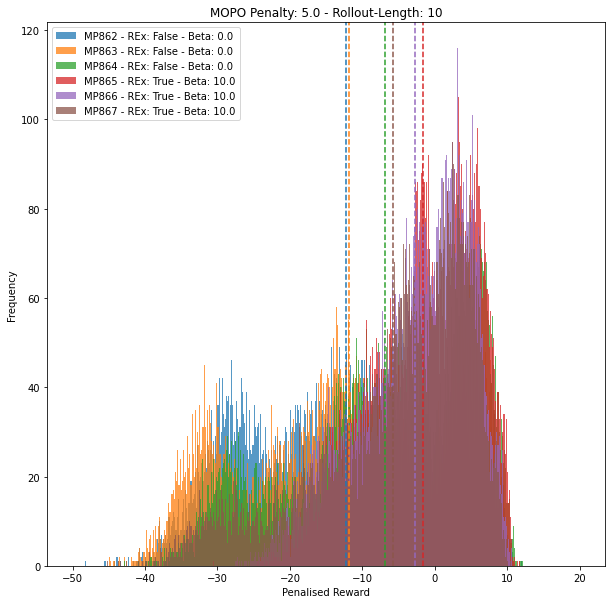

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    _, _, _, rew, _, _, _ = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.hist(rew, bins=np.linspace(-50,20,500), color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(rew.mean(), color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Penalised Reward')
ax.set_ylabel('Frequency')
ax.legend(loc='upper left')

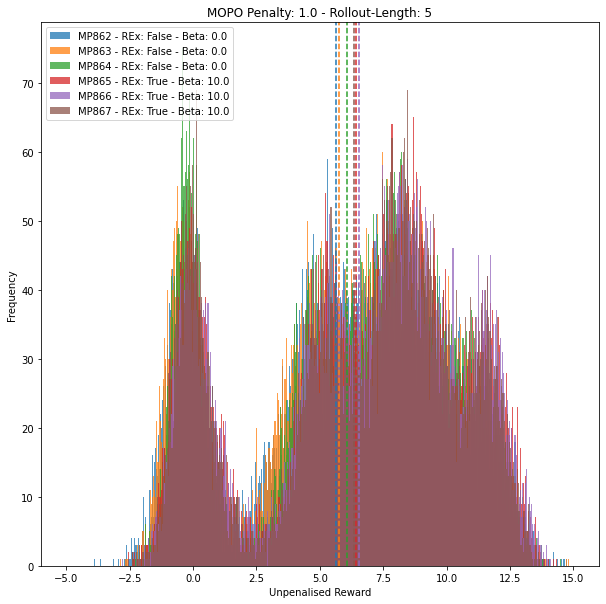

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    _, _, _, rew, _, _, pen = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.hist(rew+5*pen, bins=np.linspace(-5,15,500), color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline((rew+5*pen).mean(), color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 1.0 - Rollout-Length: 5')
ax.set_xlabel('Unpenalised Reward')
ax.set_ylabel('Frequency')
ax.legend(loc='upper left')

# Penalty Histograms

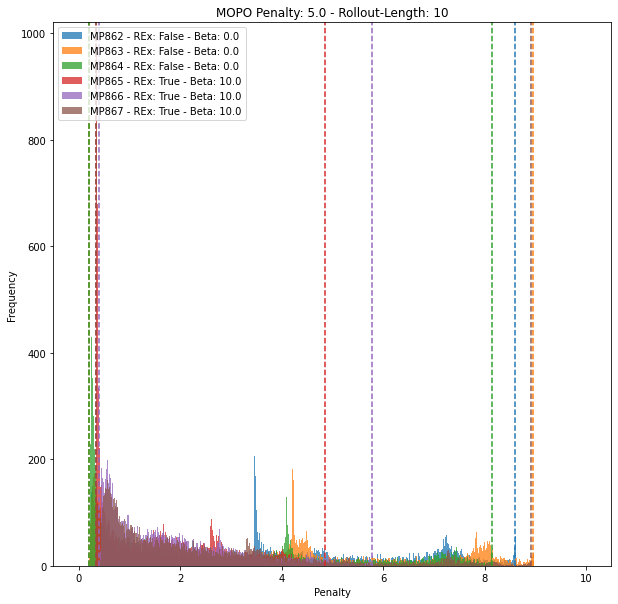

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.hist(pens, bins=np.linspace(0,10,500), color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Penalty')
ax.set_ylabel('Frequency')
ax.legend(loc='upper left')

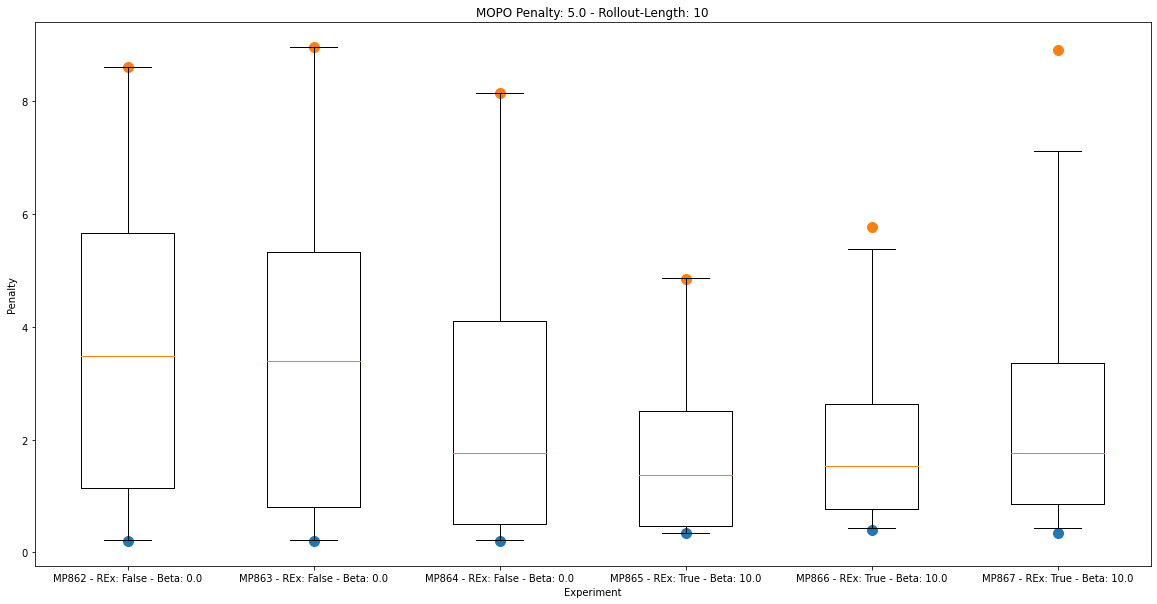

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

labels = []
pens_arrs = []
min_pens = []
max_pens = []
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pens_arrs.append(pens.flatten())
    
    labels.append(f'{exp} - REx: {rex} - Beta: {beta}')
    min_pens.append(exp_details.min_penalty)
    max_pens.append(exp_details.max_penalty)

x_vals = np.arange(len(pens_arrs))+1
ax.boxplot(pens_arrs, showfliers=False)
ax.scatter(x_vals, min_pens, s=100)
ax.scatter(x_vals, max_pens, s=100)

ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Experiment')
ax.set_ylabel('Penalty')
ax.set_xticks(x_vals)
ax.set_xticklabels(labels)
pass

# RMSE Histograms

MP862: 0.24955374002456665, 3.814697265625e-06, 442.7005615234375, 6.199459552764893, 0.42969498634338243
MP863: 12.90026569366455, 1.1444091796875e-05, 127342.109375, 1273.357421875, 0.4332466840744018
MP864: 0.09091097861528397, 1.9073486328125e-06, 9.948990821838379, 0.20477022230625153, 0.3008054435253135
MP865: 0.08585309982299805, 1.0013580322265625e-05, 19.193424224853516, 0.3049009144306183, 0.22197389602661133
MP866: 0.08375353366136551, 4.6424102038145065e-06, 6.5401835441589355, 0.128366619348526, 0.23584081307053564
MP867: 0.08487531542778015, 4.172325134277344e-07, 11.21087646484375, 0.16662557423114777, 0.2508760690689087


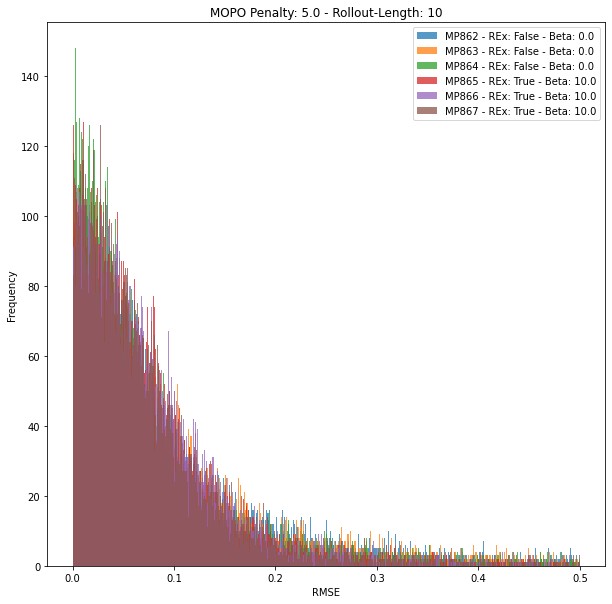

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    rmse_vals = np.sqrt(training_results[exp].mse_results)
    ax.hist(rmse_vals, bins=np.linspace(0,0.5,500), color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    # ax.axvline(np.nanmean(rmse_vals), color=cols[i], ls='--')
    print(f'{exp}: {rmse_vals.mean()}, {rmse_vals.min()}, {rmse_vals.max()}, {rmse_vals.std()}, {np.quantile(rmse_vals, 0.95)}')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('RMSE')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

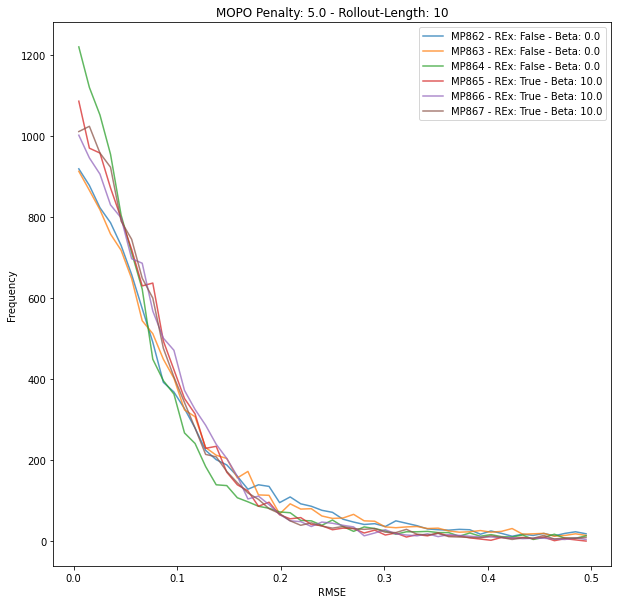

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    bin_min, bin_max, bin_size = 0, 0.5, 50
    bins = np.linspace(bin_min, bin_max, bin_size)
    hist_arr, _ = np.histogram(np.sqrt(training_results[exp].mse_results), bins=bins)

    plt.plot((bins + bin_max/(2*(bin_size-1)))[:-1], hist_arr, color=cols[i], alpha=0.75, label=f'{exp} - REx: {rex} - Beta: {beta}')
    # ax.axvline(np.nanmean(np.sqrt(training_results[exp].mse_results)), color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('RMSE')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

(-0.01, 0.35)

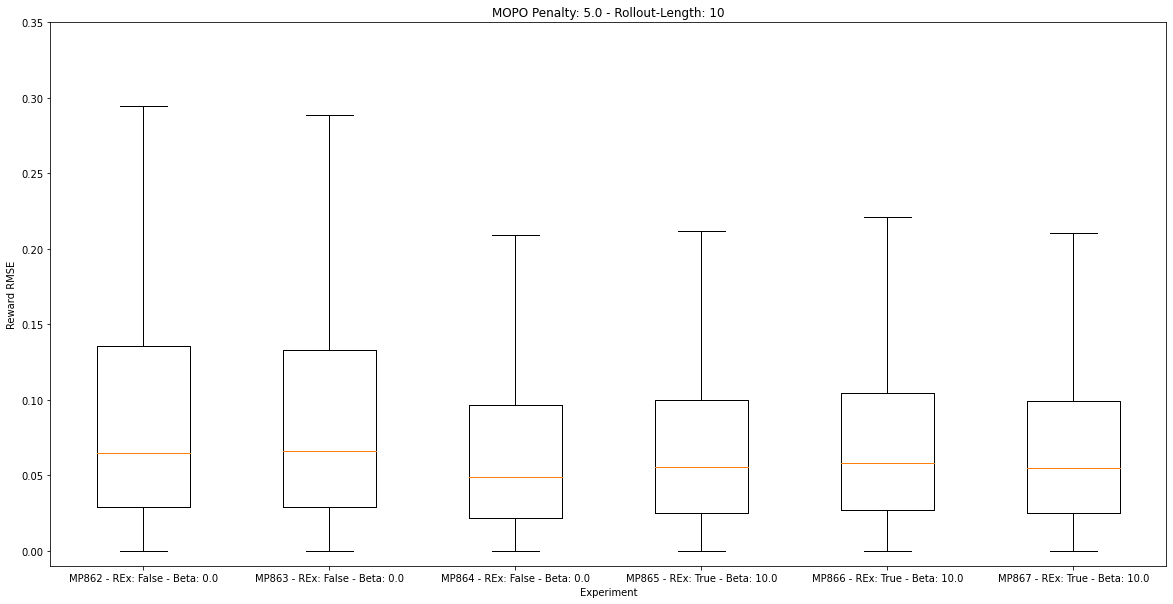

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

labels = []
rmse_arrs = []
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    labels.append(f'{exp} - REx: {rex} - Beta: {beta}')
    rmse_arrs.append(np.sqrt(training_results[exp].mse_results).flatten())

ax.boxplot(rmse_arrs, showfliers=False, labels=labels)

ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Experiment')
ax.set_ylabel('Reward RMSE')
ax.set_ylim(-0.01,0.35)

# Penalty/Reward RMSE Calibration

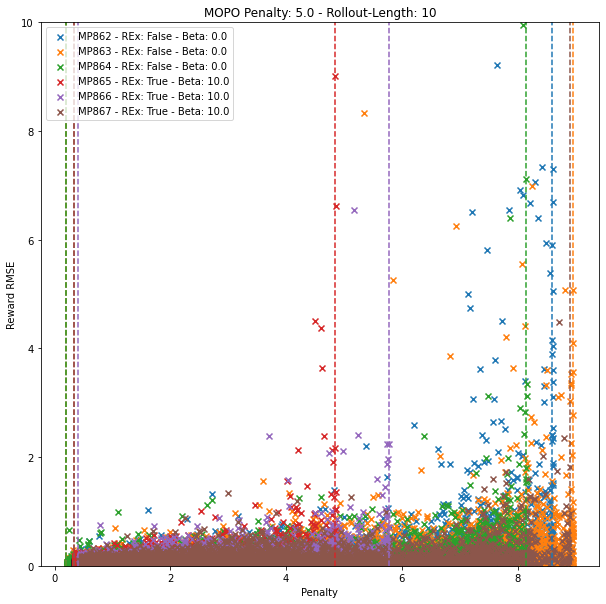

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.scatter(pens, np.sqrt(training_results[exp].mse_results), marker='x', color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Penalty')
ax.set_ylabel('Reward RMSE')
ax.set_ylim(0, 10)
ax.legend(loc='upper left')

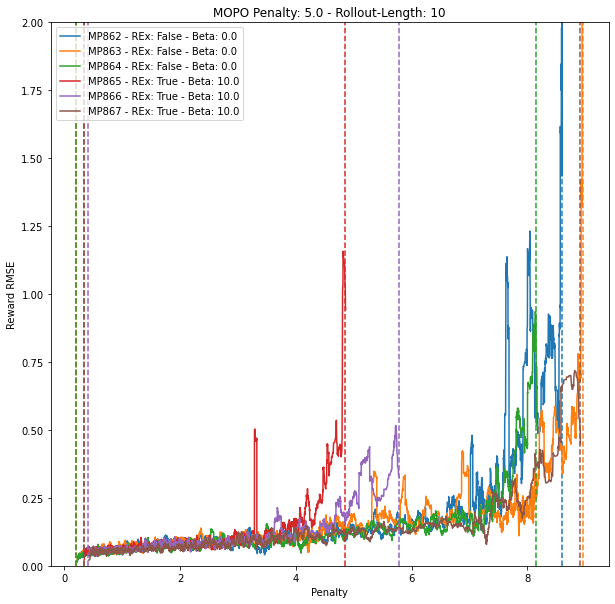

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pen_vals, rmse_err_vals = pens.flatten(), np.sqrt(training_results[exp].mse_results).flatten()
    arg_sort_ind = np.argsort(pen_vals)
    pen_vals, rmse_err_vals = pen_vals[arg_sort_ind], rmse_err_vals[arg_sort_ind]
    
    kernel_size = 50
    kernel = np.ones(kernel_size) / kernel_size
    rmse_err_convolved = np.convolve(rmse_err_vals, kernel, mode='same')

    ax.plot(pen_vals, rmse_err_convolved, color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Penalty')
ax.set_ylabel('Reward RMSE')
ax.set_ylim(0, 2)
ax.legend(loc='upper left')

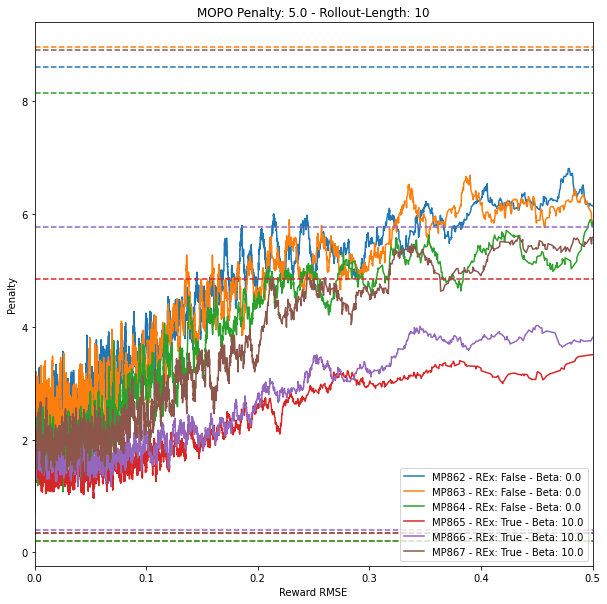

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pen_vals, rmse_err_vals = pens.flatten(), np.sqrt(training_results[exp].mse_results).flatten()
    arg_sort_ind = np.argsort(rmse_err_vals)
    pen_vals, rmse_err_vals = pen_vals[arg_sort_ind], rmse_err_vals[arg_sort_ind]
    
    kernel_size = 50
    kernel = np.ones(kernel_size) / kernel_size
    pen_convolved = np.convolve(pen_vals, kernel, mode='same')

    ax.plot(rmse_err_vals, pen_convolved, color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axhline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axhline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Reward RMSE')
ax.set_ylabel('Penalty')
ax.set_xlim(0, 0.5)
ax.legend(loc='lower right')

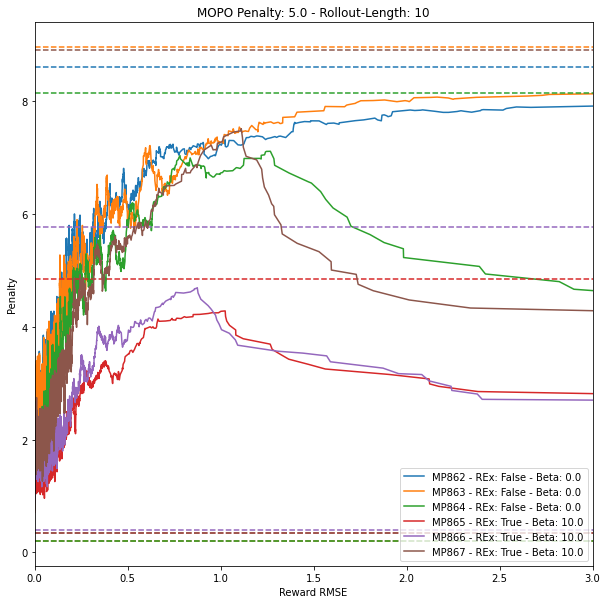

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    pen_vals, rmse_err_vals = pens.flatten(), np.sqrt(training_results[exp].mse_results).flatten()
    arg_sort_ind = np.argsort(rmse_err_vals)
    pen_vals, rmse_err_vals = pen_vals[arg_sort_ind], rmse_err_vals[arg_sort_ind]
    
    kernel_size = 50
    kernel = np.ones(kernel_size) / kernel_size
    pen_convolved = np.convolve(pen_vals, kernel, mode='same')

    ax.plot(rmse_err_vals, pen_convolved, color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axhline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axhline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Reward RMSE')
ax.set_ylabel('Penalty')
ax.set_xlim(0, 3)
ax.legend(loc='lower right')

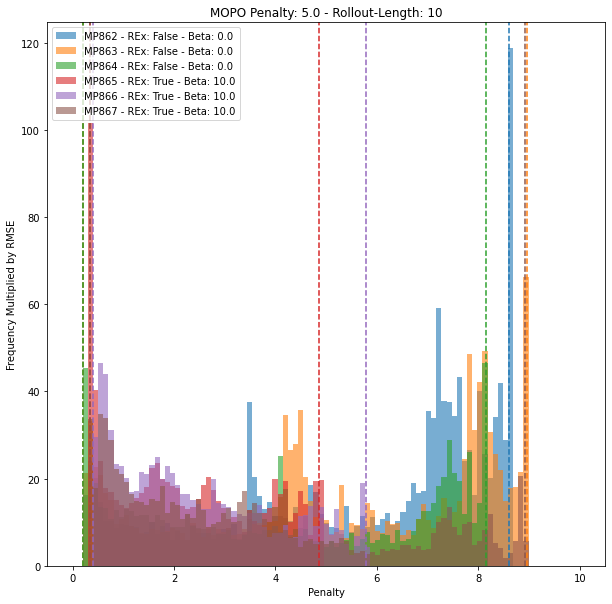

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, _, _, _, pens = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    rmse_vals = np.sqrt(training_results[exp].mse_results).flatten()
    rmse_lim = rmse_vals < 15
    ax.hist(pens.flatten()[rmse_lim], weights=rmse_vals[rmse_lim], bins=np.linspace(0,10,100), color=cols[i], alpha=0.6, label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axvline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Penalty')
ax.set_ylabel('Frequency Multiplied by RMSE')
ax.legend(loc='upper left')

# Reward/Reward RMSE

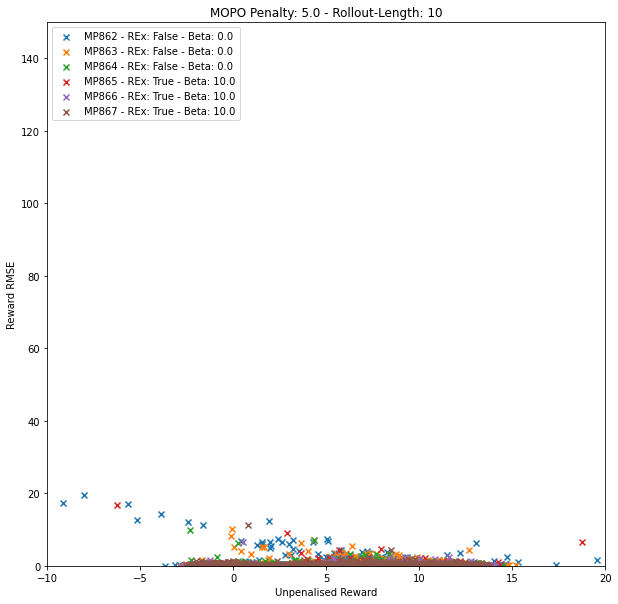

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, rew, _, _, pen = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.scatter(rew+5*pen, np.sqrt(training_results[exp].mse_results), marker='x', color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    # ax.axvline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Unpenalised Reward')
ax.set_ylabel('Reward RMSE')
ax.set_xlim(-10, 20)
ax.set_ylim(0, 150)
ax.legend(loc='upper left')

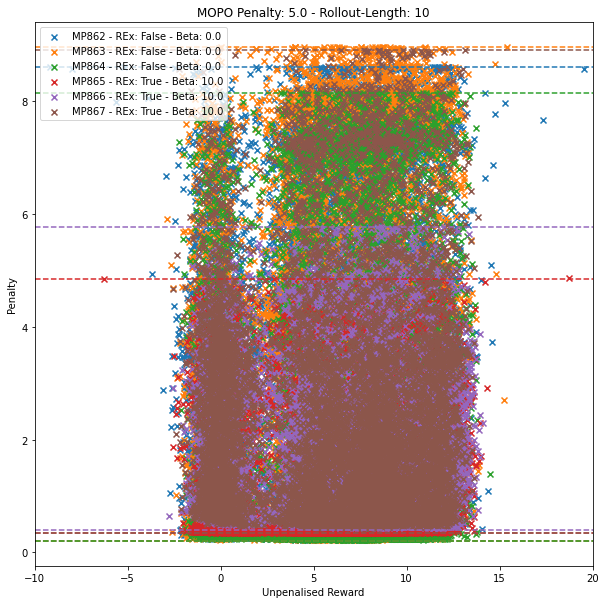

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i, (exp, rex, beta) in enumerate([
    ("MP862", False, 0.0),
    ("MP863", False, 0.0),
    ("MP864", False, 0.0),
    ("MP865", True, 10.0),
    ("MP866", True, 10.0),
    ("MP867", True, 10.0),
]):
    exp_details = get_experiment_details(exp)
    _, _, _, rew, _, _, pen = split_halfcheetah_v2_trans_arr(training_results[exp].pool)
    ax.scatter(rew+5*pen, pen, marker='x', color=cols[i], label=f'{exp} - REx: {rex} - Beta: {beta}')
    ax.axhline(exp_details.min_penalty, color=cols[i], ls='--')
    ax.axhline(exp_details.max_penalty, color=cols[i], ls='--')
ax.set_title('MOPO Penalty: 5.0 - Rollout-Length: 10')
ax.set_xlabel('Unpenalised Reward')
ax.set_ylabel('Penalty')
ax.set_xlim(-10, 20)
# ax.set_ylim(0, 40)
ax.legend(loc='upper left')